In [1]:
#Analisando Ações com Python usando Yahoo Finance
#Vídeo 1 - Importando dados do Yahoo Finance
#1. Estas são as bibliotecas necessárias para a análise dos dados
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#1.1 - Essas são as bibliotecas para analisar os dados obtidos na Web do site Yahoo Finance. 
import pandas_datareader.data as web
import yfinance as yf
#1.1.2 - Essa é a biblioteca para analisar os fundamentos das empresas selecionadas
import fundamentos as fts

In [2]:
#1.2 - Assim percorremos todos os dados obtidos no Yahoo Finance.
yf.pdr_override()

In [3]:
#2.0 - O comando web.get_data_yahoo nos permite obter os dados da Bovespa através de sua sigla. 
ibov = web.get_data_yahoo('^BVSP')
#2.1 - E podemos testar os últimos e os primeiros dados dentro do banco de dados

[*********************100%***********************]  1 of 1 completed


In [4]:
#2.1.1 - A cauda do IBOV(Os dados mais recentes)
ibov.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-30,119410.0,120150.0,118919.0,119306.0,119306.0,8235700
2021-01-04,119024.0,120354.0,118062.0,118558.0,118558.0,8741400
2021-01-05,118835.0,119790.0,116756.0,119223.0,119223.0,9257100
2021-01-06,119377.0,120924.0,118917.0,119851.0,119851.0,11638200
2021-01-07,119103.0,121983.0,119101.0,121956.0,121956.0,11774800


In [5]:
#2.1.2 - A ponta do IBOV (Os dados mais antigos)
ibov.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


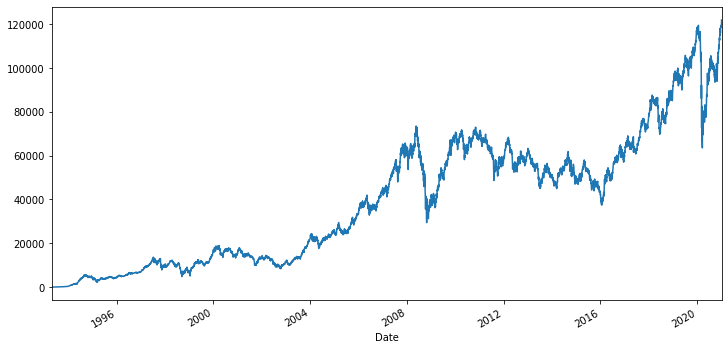

In [6]:
#E usando o comando plot e figsize, criamos um gráfico do fechamento do IBOV desde seu início em ~1995.
ibov["Close"].plot(figsize=(12,6))


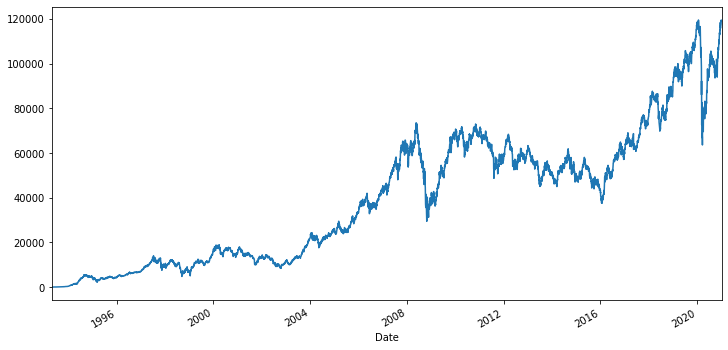

In [7]:
#Assim como é possível criarmos um gráfico de sua abertura todos os dias desde ~1995.
ibov["Open"].plot(figsize=(12,6))

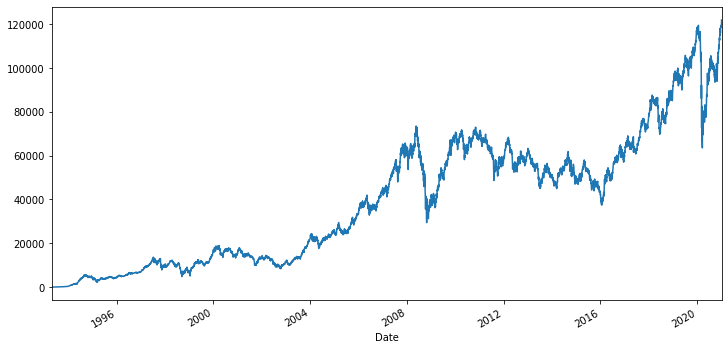

In [13]:
#E o fechamento ajustado
ibov["Adj Close"].plot(figsize=(12,6))

[*********************100%***********************]  1 of 1 completed


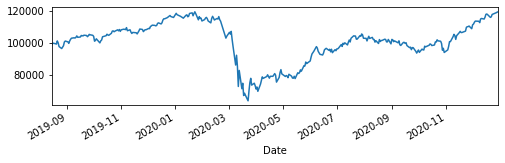

In [15]:
#Podemos fatiar uma parte específica do ibovespa
ibovparcial = web.get_data_yahoo('^BVSP', start = '2019-08-15', end='2020-12-31')
ibovparcial["Close"].plot(figsize=(8,2))

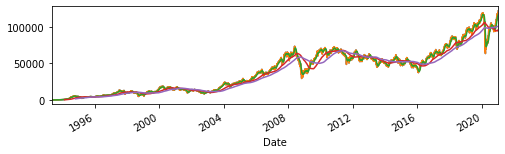

In [16]:
#Vídeo 2 - Definindo intervalos,
# calculando e plotando médias móveis
ibov["Close"].plot(figsize=(8,2), label="IBOV")
#O Comando rolling é usado para calcular a média móvel de X dias
ibov["Close"].plot(figsize=(8,2), label="IBOV")
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
ibov["Adj Close"].rolling(365).mean().plot(label="MM365")

In [17]:
#Parcelas menores do IBOV, por exemplo entre 2008 e 2015
ibov_fatiado = ibov[(ibov.index.year >= 2019) & (ibov.index.year <=2020)] 
# Médias móveis relacionadas a parte que separei do IBOV. Posso analisar a média móvel entre 2019-2020. 
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
ibov_fatiado["Close"].rolling(365).mean().plot(label="MM365")
ibov_fatiado["Close"].plot(figsize=(8,2), label="IBOV20192020")

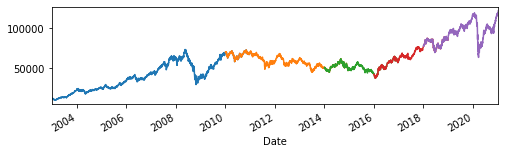

In [27]:
#Podemos utilizar essa mesma técnica para verificar o IBOV em diferentes governos.
# Por exemplo, o IBOV durante o governo FHC
ibovFHC = ibov[(ibov.index.year >= 1995) & (ibov.index.year <= 2003)]
ibovFHC ["Adj Close"].plot(figsize=(8,2))
#E agora os dois mandatos do Governo Lula
ibovLula = ibov[(ibov.index.year >= 2003) & (ibov.index.year <=2010)]
ibovLula ["Adj Close"].plot(figsize=(8,2))
#O Primeiro mandato do Governo Dilma
ibovDilma1 = ibov[(ibov.index.year >=2010) & (ibov.index.year <= 2014)]
ibovDilma1 ["Adj Close"].plot(figsize=(8,2))
# O Segundo mandato até o Impeachment
ibovDilma2 = ibov[(ibov.index.year>=2014)&(ibov.index.year <= 2016)]
ibovDilma2 ["Adj Close"].plot(figsize=(8,2))
#Governo Temer 
ibovTemer = ibov[(ibov.index.year>=2016)&(ibov.index.year <= 2018)]
ibovTemer ["Adj Close"].plot(figsize=(8,2))
#Governo Bolsonaro
ibovBolsonaro = ibov[(ibov.index.year >=2018)]
ibovBolsonaro ["Adj Close"].plot(figsize=(8,2))

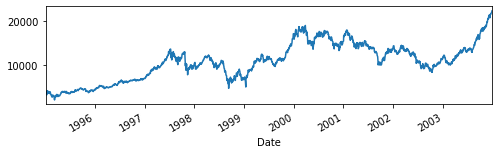

In [25]:
# Por exemplo, o IBOV durante o governo FHC
ibovFHC = ibov[(ibov.index.year >= 1995) & (ibov.index.year <= 2003)]
ibovFHC ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#E agora os dois mandatos do Governo Lula
ibovLula = ibov[(ibov.index.year >= 2003) & (ibov.index.year <=2010)]
ibovLula ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#O Primeiro mandato do Governo Dilma
ibovDilma1 = ibov[(ibov.index.year >=2010) & (ibov.index.year <= 2014)]
ibovDilma1 ["Adj Close"].plot(figsize=(8,2))

In [ ]:
# O Segundo mandato até o Impeachment
ibovDilma2 = ibov[(ibov.index.year>=2014)&(ibov.index.year <= 2016)]
ibovDilma2 ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#Governo Temer 
ibovTemer = ibov[(ibov.index.year>=2016)&(ibov.index.year <= 2018)]
ibovTemer ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#Governo Bolsonaro
ibovBolsonaro = ibov[(ibov.index.year >=2018)]
ibovBolsonaro ["Adj Close"].plot(figsize=(8,2))

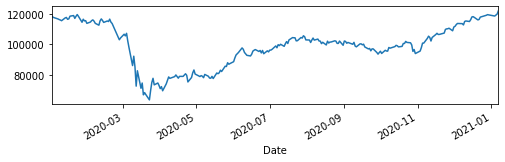

In [19]:
ibov2020 = ibov[(ibov.index.year >=2020)]
ibov2020 ["Close"].plot(figsize=(8,2))

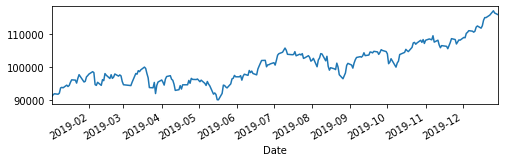

In [20]:
ibov2019 = ibov[(ibov.index.year >= 2019)&(ibov.index.year <=2019)]
ibov2019 ["Close"].plot(figsize=(8,2))

In [23]:
#Filtro por mês, sendo 12, todos os meses de dezembro
ibov_fatiado = ibov[ibov.index.month ==12]
ibov_fatiado.tail()

ibov_fatiado = ibov[ibov.index.month ==9]
ibov_fatiado.tail()

ibov_fatiado = ibov[ibov.index.month ==6]
ibov_fatiado.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-24,95974.0,95974.0,93259.0,94377.0,94377.0,9962700
2020-06-25,94382.0,96260.0,94152.0,95983.0,95983.0,8697900
2020-06-26,95979.0,95979.0,93514.0,93834.0,93834.0,8439100
2020-06-29,93837.0,95735.0,93825.0,95735.0,95735.0,8906800
2020-06-30,95728.0,96257.0,94806.0,95056.0,95056.0,10144500


In [24]:
ibov_fatiado = ibov[ibov.index.month ==3]
ibov_fatiado.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-25,69727.0,76714.0,69360.0,74956.0,74956.0,12951100
2020-03-26,74956.0,78846.0,74923.0,77710.0,77710.0,12758000
2020-03-27,77708.0,77708.0,73057.0,73429.0,73429.0,10301400
2020-03-30,73431.0,75430.0,73184.0,74640.0,74640.0,9032200
2020-03-31,74629.0,75511.0,72385.0,73020.0,73020.0,11141500


In [8]:
#FIIs em carteira desde Fev2020
habt11 = web.get_data_yahoo('HABT11.SA', start='2020-02-01', end='2021-01-08')
tgar11 = web.get_data_yahoo('TGAR11.SA', start='2020-02-01', end='2021-01-08')
xplg11 = web.get_data_yahoo('XPLG11.SA', start='2020-02-01', end='2021-01-08')
mxrf11 = web.get_data_yahoo('MXRF11.SA', start='2020-02-01', end='2021-01-08')
flma11 = web.get_data_yahoo('FLMA11.SA', start='2020-02-01', end='2021-01-08')
knri11 = web.get_data_yahoo('KNRI11.SA', start='2020-02-01', end='2021-01-08')
bcff11 = web.get_data_yahoo('BCFF11.SA', start='2020-02-01', end='2021-01-08')
xpsf11 = web.get_data_yahoo('XPSF11.SA', start='2020-02-01', end='2021-01-08')
xpci11 = web.get_data_yahoo('XPCI11.SA', start='2020-02-01', end='2021-01-08')

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\kioolz\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\kioolz\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\kioolz\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\kioolz\Anaconda3\lib\site-packages\yfinance\multi.py", line 167, in _download_one_threaded
    actions, period, interval, prepost, proxy, rounding)
  File "C:\Users\kioolz\Anaconda3\lib\site-packages\yfinance\multi.py", line 182, in _download_one
    rounding=rounding, many=True)
  File "C:\Users\kioolz\Anaconda3\lib\site-packages\yfinance\base.py", line 127, in history
    end = int(_time.mktime(_time.strptime(str(end), '%Y-%m-%d')))
  File "C:\Users\kioolz\Anaconda3\lib\_strptime.py", line 571, in _strptime_time
    tt = _strptime(data_string, format)[0]


cotatgar11 = tgar11["Close"].plot(figsize=(8,2), label="habt11")

cotahabt11 = habt11["Close"].plot(figsize=(8,2), label="habt11")

In [ ]:
cotaxplg11 = xplg11["Close"].plot(figsize=(8,2), label="xplg11")

In [ ]:
cotaxpci11 = xpci11["Close"].plot(figsize=(8,2), label="xpci11")

In [ ]:
cotaxpsf11 = xpsf11["Close"].plot(figsize=(8,2), label="xpsf11")


In [ ]:
cotabcff11 = bcff11["Close"].plot(figsize=(8,2), label="bcff11")

In [ ]:
cotamxrf11 = mxrf11["Close"].plot(figsize=(8,2), label="mxrf11")

In [ ]:
cotaknri11 = knri11["Close"].plot(figsize=(8,2), label="knri11")

In [ ]:
#Ou podemos observar o valor de uma cotação de uma determinada ação dentro também de um intervalo específico
vale3 = web.get_data_yahoo('VALE3.SA', start=datetime.datetime(2020,1,1), end='today')
bees3  = web.get_data_yahoo('BEES3.SA', start=datetime.datetime(2020,1,1), end='today')
abev3  = web.get_data_yahoo('ABEV3.SA', start=datetime.datetime(2020,1,1), end='today')
itsa4  = web.get_data_yahoo('ITSA4.SA', start=datetime.datetime(2020,1,1), end='today')
klbn4  = web.get_data_yahoo('KLBN4.SA', start=datetime.datetime(2020,1,1), end='today')
wege3  = web.get_data_yahoo('WEGE3.SA', start=datetime.datetime(2020,1,1), end='today')
grnd3  = web.get_data_yahoo("GRND3.SA", start=datetime.datetime(2020,1,1), end='today')
mrve3  = web.get_data_yahoo("MRVE3.SA", start=datetime.datetime(2020,1,1), end='today')
bbas3  = web.get_data_yahoo("BBAS3.SA", start=datetime.datetime(2020,1,1), end='today')
itub4  = web.get_data_yahoo("ITUB4.SA", start=datetime.datetime(2020,1,1), end='today')
egie3  = web.get_data_yahoo("EGIE3.SA", start=datetime.datetime(2020,1,1), end='today')
sqia3  = web.get_data_yahoo("SQIA3.SA", start=datetime.datetime(2020,1,1), end='today')
bpan4  = web.get_data_yahoo("BPAN4.SA", start=datetime.datetime(2020,1,1), end='today')
tpis3  = web.get_data_yahoo("TPIS3.SA", start=datetime.datetime(2020,1,1), end='today')
tris3  = web.get_data_yahoo("TRIS3.SA", start=datetime.datetime(2020,1,1), end='today')
jhsf3  = web.get_data_yahoo("JHSF3.SA", start=datetime.datetime(2020,1,1), end='today')


In [ ]:
#Ativo Total - Total Assets
#Ativo Circulante - Current Assets
#Ativo Não Circulante - Non-current Assets
#Passivo Total - Total Liabilities
#Passivo Circulante - Current Liabilities
#Passivo Não Circulante - Non-current Liabilities
#Patrimônio Líquido - Net Worth


In [ ]:
#Fundamentos das empresas em carteira
#Todos os fundamentos históricos, anualmente
#O comando fts.get_fundamentos serve para puxar o fundamento da empresa.
ftsitub4 = fts.get_fundamentos('ITUB4')
ftsbees3 = fts.get_fundamentos('BEES3')
ftsabev3 = fts.get_fundamentos('ABEV3')
ftsklbn4 = fts.get_fundamentos('KLBN4')
ftswege3 = fts.get_fundamentos('WEGE3')
#JHSF3, TRIS3, TPIS3, BPAN4, SQIA3, EGIE3, ITUB4, BBAS3, MRVE3, GRND3, WEGE3, KLBN4, ITSA4, ABEV3, BEES3




#Todos os fundamentos dos terceiros trimestres
ftsitub43t = fts.get_fundamentos('ITUB4', quarter=3)
#Todos os fundamentos do primeiro trimestre de 2013
ftsitub41t20 = fts.get_fundamentos('ITUB4', year=2020, quarter=1)



df5 = fts.get_fundamentos('GRND3')
df6 = fts.get_fundamentos('mrve3')
df7 = fts.get_fundamentos('BBAS3')
df8 = fts.get_fundamentos('ITUB4')
df9 = fts.get_fundamentos('EGIE3')
df11 = fts.get_fundamentos('BPAN4')
df12 = fts.get_fundamentos('TPIS3')
df13 = fts.get_fundamentos('TRIS3')
df14 = fts.get_fundamentos('JHSF3')

# E daí usamos o print para exibir. 
print(ftsitub4)

In [ ]:
#Baixa todos os balanços anuais da empresa
balance1 = fts.get_balanco('ITUB4')
print(balance1)

In [ ]:
itub4  = web.get_data_yahoo("ITUB4.SA", start='2019-01-01', end='2019-12-31')
cotaitub4 = itub4["Close"].plot(figsize=(8,2))

In [ ]:
#Dívidendos pagos
ftsitub4['Dividendos']

In [ ]:
#Escala do gráfico está errada se plotar todas as variáveis juntas
# Por isso plotamos cada coluna separadamente, DYpago está em reais, Payout como todos apresentam um valor 0 < x < 1 assumo que seja uma porcentagem não convertida. Agora, a exponencial no Dividendos e JCP não faz sentido. 
ftsitub4['Dividendos','DY'].plot(figsize=(8,2))

In [ ]:
cotaitub4 = itub4["Close"].plot(figsize=(8,2), label="ITUB4")

In [ ]:

cotaitsa4 = itsa4["Close"].plot(figsize=(8,2), label="ITSA4")

In [ ]:
# E aqui podemos ter acesso aos dados mais recentes do Ibov de forma gráfica
ibov.tail(9)["Open"].plot()

In [ ]:
flma11.tail()
itsa4.tail()
mxrf11.tail()

In [ ]:
mxrf11.tail(14)

In [ ]:
ibov.tail()